In [2]:
import numpy as np
import pandas as pd
from matplotlib import font_manager , rc
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='Malgun Gothic')


In [5]:
df1 = pd.read_csv('./공공자전거 대여이력 정보_2021.01.csv',
                encoding='cp949', low_memory=False)
df2 = pd.read_csv('./공공자전거 대여이력 정보_2021.02.csv',
                encoding='cp949', low_memory=False)
df3 = pd.read_csv('./공공자전거 대여이력 정보_2021.03.csv',
                encoding='cp949', low_memory=False)
df4 = pd.read_csv('./공공자전거 대여이력 정보_2021.04.csv',
                encoding='cp949', low_memory=False)
df5 = pd.read_csv('./공공자전거 대여이력 정보_2021.05.csv',
                encoding='cp949', low_memory=False)
df6 = pd.read_csv('./공공자전거 대여이력 정보_2021.06.csv',
                encoding='cp949', low_memory=False)


In [41]:
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

In [10]:
df.shape

(13613873, 11)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


In [92]:
#불필요 컬럼제거
df = df.drop(columns=['자전거번호','대여거치대','반납거치대'])

In [44]:
# 카테고리 형변환
df['반납대여소번호'] = df['반납대여소번호'].astype('category')
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')

In [45]:
# datetime으로 변환
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'],errors='coerce')

In [46]:
# errors 오류 : {무시 , 상승 , 강제}, 기본 상슴
# 'raise'  : 잘못된 구문 분석은 예외를 발생
# 'coerce' : 잘못된 구문 분석이 NaT로 설정
# 'ignore' : 잘못된 구문 분석이 입력을 반환함.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  category      
 3   대여 대여소명   object        
 4   대여거치대     object        
 5   반납일시      datetime64[ns]
 6   반납대여소번호   category      
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      float64       
 10  이용거리      float64       
dtypes: category(2), datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 1.1+ GB


In [50]:
df.isna().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [51]:
df.dropna(inplace=True)

In [71]:
# 분석 : 일별 이용현황
#대여날짜 컬럼을 추가
df['대여날짜'] = df['대여일시'].dt.date
df.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여날짜
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0,2021-01-02
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.0,2021-01-04


In [68]:
#대여 날짜별 대여 건수
df_count=df.groupby('대여날짜').대여일시.count().to_frame()

In [77]:
df_count.columns=['대여건수']

Text(0.5, 1.0, '서울시 공공자전거 대여')

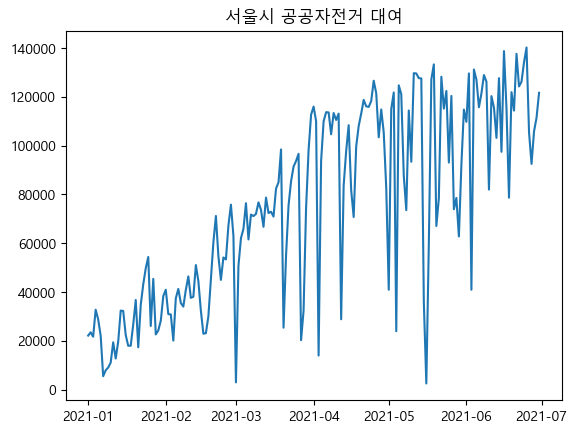

In [66]:
#대여날짜별 대여건수 시각화
x=df_count.index
y=df_count.values
plt.plot(x,y)
plt.title('서울시 공공자전거 대여')

In [79]:
#대여 날짜별 이용시간
df_sum=df.groupby('대여날짜')['이용시간'].sum().to_frame()
df_sum

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


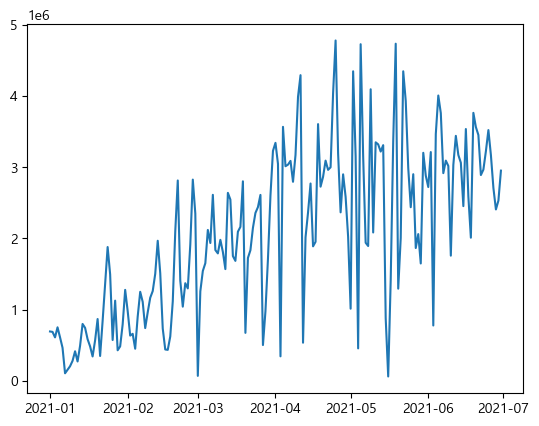

In [80]:
x=df_sum.index
y=df_sum.values
plt.plot(x,y)

In [83]:
#대여 날짜 별 이용 거리
df_dis=df.groupby('대여날짜').이용거리.sum().to_frame()
df_dis

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


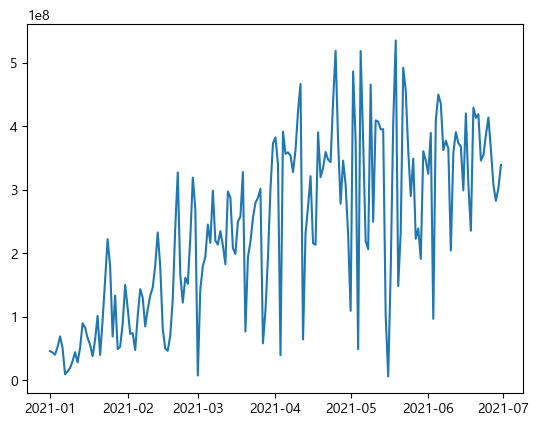

In [84]:
x=df_dis.index
y=df_dis.values
plt.plot(x,y)

In [85]:
df_date=pd.concat([df_count,df_sum,df_dis],axis=1)
df_date.head(3)

,대여건수,이용시간,이용거리
대여날짜,,,
2021-01-01,22119,692309.0,46135287.75
2021-01-02,23463,686580.0,44096180.54
2021-01-03,21656,609571.0,40598300.28


In [89]:
#시간대별 대여/반납현황
df['대여시간']=df['대여일시'].dt.hour
df['반납시간']=df['반납일시'].dt.hour

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613604 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
 9   대여시간      int64         
 10  반납시간      int64         
dtypes: category(2), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 1.1+ GB


In [103]:
#시간대별 대여 현황
df_rental = df['대여시간'].value_counts()

In [104]:
#시간대별 반납 현황
df_return = df['반납시간'].value_counts()

Text(0, 0.5, '대여건수')

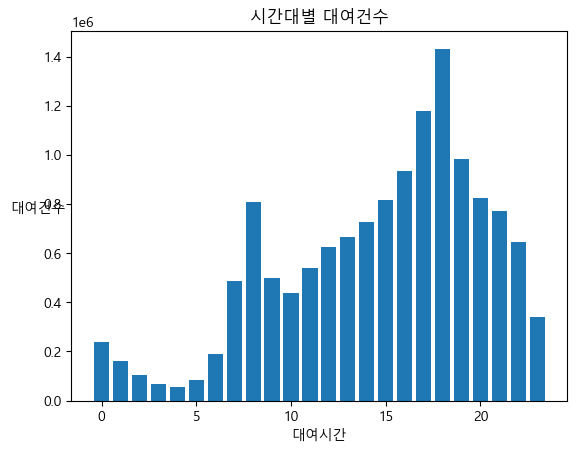

In [114]:
#대여시각화
x = df_rental.index
y = df_rental.values
plt.bar(x,y)
plt.title('시간대별 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수',rotation=0)

Text(0, 0.5, '반납건수')

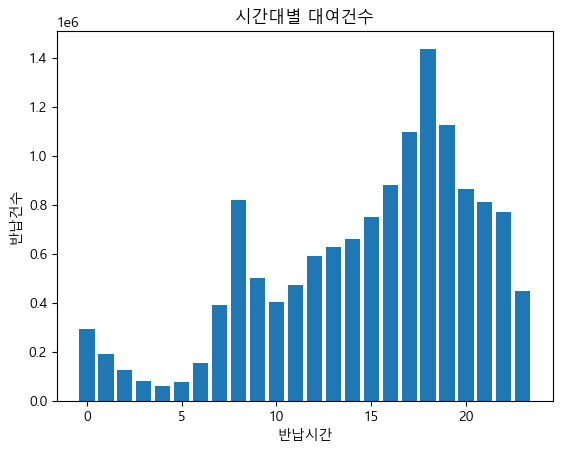

In [109]:
#반납시각화
x = df_return.index
y = df_return.values
plt.bar(x,y)
plt.title('시간대별 대여건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')

In [116]:
#대여소별 대여/반납현황
df['대여 대여소번호']

0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [118]:
df['반납대여소번호']

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [119]:
#대여소 번호의 규칙을 통일하기 위해 0을 제거
df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [121]:
#왼쪽의 0을 제거
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')

In [128]:
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [129]:
df['반납대여소번호']

0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [145]:
df_retp=df[['반납대여소번호','반납대여소명']].value_counts()[:10].to_frame()

In [146]:
df_renp=df[['대여 대여소번호','대여 대여소명']].value_counts()[:10].to_frame()

여의나루역 1번출구앞 대여소 이용현황

In [160]:
df_207 = df[df['대여 대여소번호'] == 207]

In [165]:
df_exam=df[(df['대여 대여소번호'] == 207)& 
           (df['반납대여소번호'] == 207)].groupby('대여날짜')['이용거리'].sum().to_frame()

In [166]:
#여의나루 1번출구 앞에서 빌려서 제일 많이 반납한 장소
df_207[['반납대여소번호','반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
2414,도곡역 아카데미스위트 앞,1
669,청계한신휴플러스앞 삼거리,1
1661,당현천근린공원,1


In [168]:
#요일별 대여현황
df_207['대여요일']=df_207['대여일시'].dt.strftime('%a')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9400\622060603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일']=df_207['대여일시'].dt.strftime('%a')


In [170]:
df_207.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,대여요일
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,Fri
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,Fri
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,Fri
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,Fri
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,Fri


In [172]:
df_207['대여요일'].value_counts()

Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: 대여요일, dtype: int64

In [174]:
# df_207 기본통계 이용시간 (평균,최대,최소값)
# 전체데이터의 평균
df_207['이용시간'].mean()

50.28551344300312

In [176]:
df_207['이용시간'].min()

1.0

In [177]:
df_207['이용시간'].max()

1268.0

In [178]:
df['이용시간'].mean()

27.27823322905529